In [248]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,minmax_scale,scale
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [188]:
submission = pd.read_csv('C:/Users/CHANDRIKA SELVAMANI/Desktop/Data Science/Dataset/Analytics vidhya/Black friday sales/sample_submission_V9Inaty.csv')

submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']

In [189]:
train= pd.read_csv("C:/Users/CHANDRIKA SELVAMANI/Desktop/Data Science/Dataset/Analytics vidhya/Black friday sales/train.csv")
test= pd.read_csv("C:/Users/CHANDRIKA SELVAMANI/Desktop/Data Science/Dataset/Analytics vidhya/Black friday sales/test.csv")

#### Creating a copy of the dataset

In [190]:
train_copy=train.copy()
test_copy=test.copy()

#### Checking for the shape of dataset

In [191]:
train_copy.shape,test_copy.shape

((550068, 12), (233599, 11))

#### Checking for missing values

In [192]:
train_copy.isna().sum()/train_copy.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [193]:
test_copy.isna().sum()/test_copy.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

#### Identifying categorical and numerical variables

In [194]:
categorical_train=train_copy.select_dtypes(include=[np.object])
print("Categorical variables in train data:",categorical_train.shape[1])
numerical_train=train_copy.select_dtypes(include=[np.float64,np.int64])
print("Numerical variables in train data:",numerical_train.shape[1])

Categorical variables in train data: 5
Numerical variables in train data: 7


In [195]:
categorical_test=test_copy.select_dtypes(include=[np.object])
print("Categorical variables in test data:",categorical_test.shape[1])
numerical_test=test_copy.select_dtypes(include=[np.float64,np.int64])
print("Numerical variables in test data:",numerical_test.shape[1])

Categorical variables in test data: 5
Numerical variables in test data: 6


In [196]:
train_copy.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [197]:
test_copy.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

### Data Cleaning

#### Missing value imputation

##### Check for outliers

In [198]:
train_copy.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:xlabel='Product_Category_2'>

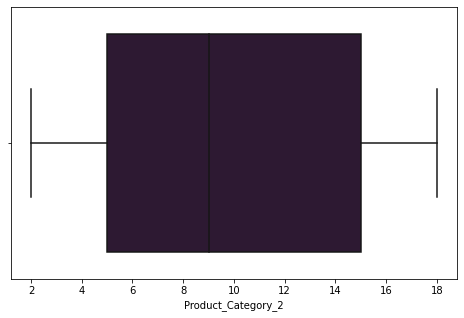

In [199]:
plt.figure(figsize=(8,5))
sns.boxplot('Product_Category_2',data=train_copy,palette='twilight')

<AxesSubplot:xlabel='Product_Category_3'>

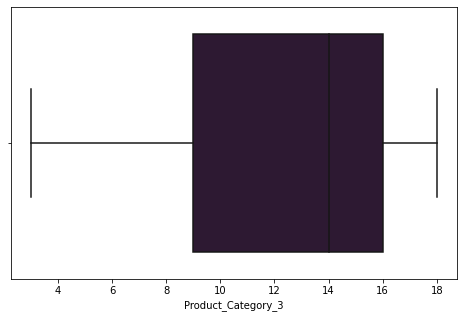

In [200]:
plt.figure(figsize=(8,5))
sns.boxplot('Product_Category_3',data=train_copy,palette='twilight')

In [201]:
train_copy['Product_Category_2']=train_copy['Product_Category_2'].fillna(train_copy['Product_Category_2'].mean())
train_copy['Product_Category_3']=train_copy['Product_Category_3'].fillna(train_copy['Product_Category_3'].mean())

In [202]:
train_copy.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

<AxesSubplot:xlabel='Product_Category_2'>

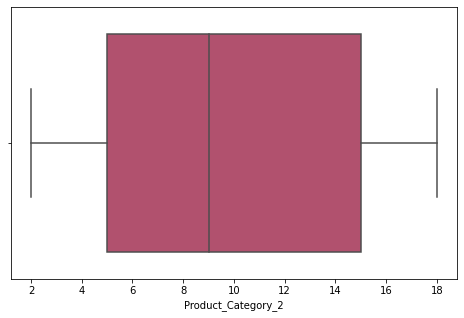

In [203]:
plt.figure(figsize=(8,5))
sns.boxplot('Product_Category_2',data=test_copy,palette='flare')

<AxesSubplot:xlabel='Product_Category_3'>

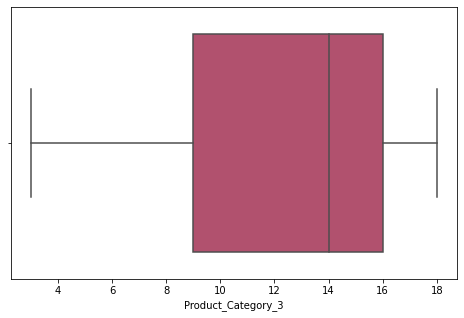

In [204]:
plt.figure(figsize=(8,5))
sns.boxplot('Product_Category_3',data=test_copy,palette='flare')

In [205]:
test_copy['Product_Category_2']=test_copy['Product_Category_2'].fillna(test_copy['Product_Category_2'].mean())
test_copy['Product_Category_3']=test_copy['Product_Category_3'].fillna(test_copy['Product_Category_3'].mean())

In [206]:
test_copy.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

#### Exploratory Data Analysis

In [207]:
train_copy['Age'].value_counts().sort_values()

0-17      15102
55+       21504
51-55     38501
46-50     45701
18-25     99660
36-45    110013
26-35    219587
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

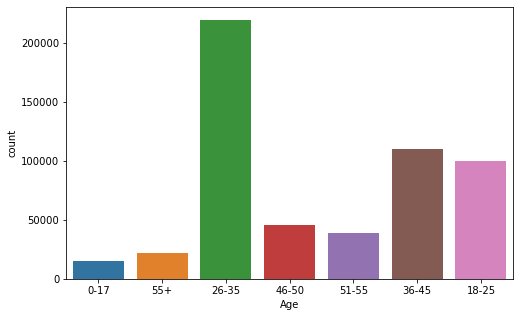

In [208]:
plt.figure(figsize=(8,5))
sns.countplot('Age',data=train_copy)

In [209]:
train_copy['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

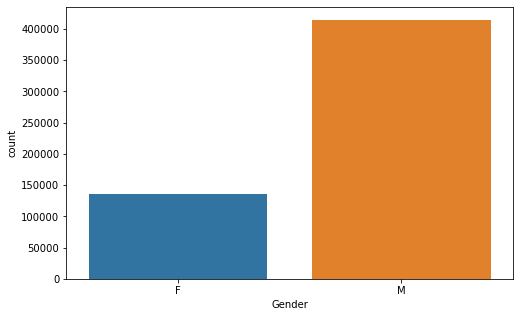

In [210]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train_copy)

In [211]:
train_copy['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

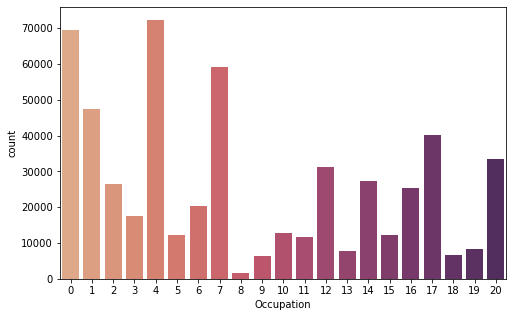

In [212]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train_copy,palette='flare')

In [213]:
train_copy['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<AxesSubplot:xlabel='City_Category', ylabel='count'>

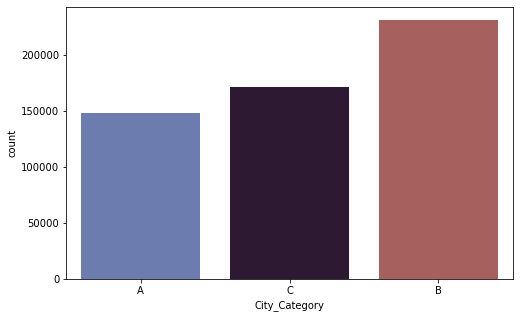

In [214]:
plt.figure(figsize=(8,5))
sns.countplot('City_Category',data=train_copy,palette='twilight')

In [215]:
train_copy['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

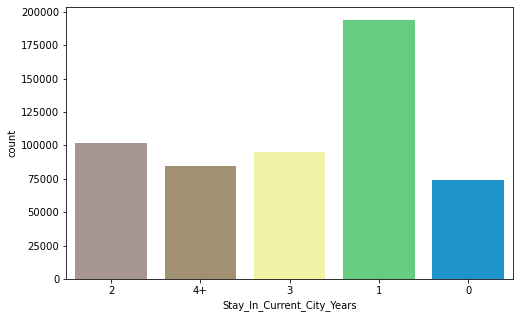

In [216]:
plt.figure(figsize=(8,5))
sns.countplot('Stay_In_Current_City_Years',data=train_copy,palette='terrain_r')

In [217]:
train_copy['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

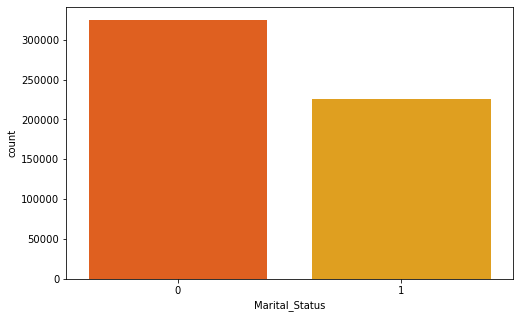

In [218]:
plt.figure(figsize=(8,5))
sns.countplot('Marital_Status',data=train_copy,palette='autumn')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

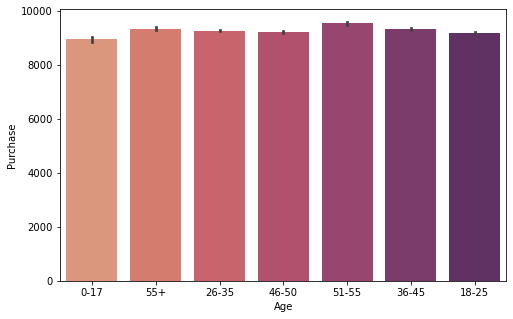

In [219]:
plt.figure(figsize=(8,5))
sns.barplot('Age','Purchase',data=train_copy,palette='flare')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

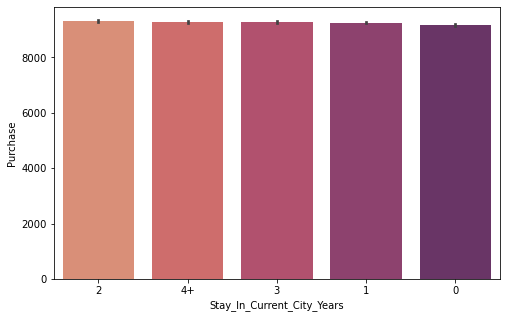

In [220]:
plt.figure(figsize=(8,5))
sns.barplot('Stay_In_Current_City_Years','Purchase',data=train_copy,palette='flare')

In [221]:
train_preprocess=train_copy
test_preprocess=test_copy

#### Applying Label encoder for 'User_ID' ,'Product_ID'

In [222]:
train_preprocess['User_ID']=le.fit_transform(train_preprocess['User_ID'])
test_preprocess['User_ID']=le.fit_transform(test_preprocess['User_ID'])

In [223]:
train_preprocess['Product_ID']=le.fit_transform(train_preprocess['Product_ID'])
test_preprocess['Product_ID']=le.fit_transform(test_preprocess['Product_ID'])

#### Using Data engineering techniques for Age, Stay_In_Current_City_Years

In [224]:
train_preprocess['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [225]:
train_preprocess['Age']=train_preprocess['Age'].map({'0-17':17,'55+':60,'26-35':35,
                                                    '46-50':50,'51-55':55,'36-45':45,'18-25':25})

In [226]:
test_preprocess['Age']=test_preprocess['Age'].map({'0-17':17,'55+':60,'26-35':35,
                                                    '46-50':50,'51-55':55,'36-45':45,'18-25':25})

In [227]:
train_preprocess['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [228]:
train_preprocess['Stay_In_Current_City_Years']=train_preprocess['Stay_In_Current_City_Years'].map({'2':2,'4+':4,
                                                                                                  '3':3,'1':1,'0':0})

In [229]:
test_preprocess['Stay_In_Current_City_Years']=test_preprocess['Stay_In_Current_City_Years'].map({'2':2,'4+':4,
                                                                                                  '3':3,'1':1,'0':0})

#### Applying Label encoder for the categorical Variables

In [230]:
categorical_train_preprocess=train_preprocess.select_dtypes(include=[np.object]).columns
le=LabelEncoder()
for col in categorical_train_preprocess:
    train_preprocess[col]=le.fit_transform(train_preprocess[col])
    

In [231]:
categorical_test_preprocess=test_preprocess.select_dtypes(include=[np.object]).columns
for cols in categorical_test_preprocess:
    test_preprocess[cols]=le.fit_transform(test_preprocess[cols])

In [232]:
train_preprocess.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,17,10,0,2,0,3,9.842329,12.668243,8370
1,0,2376,0,17,10,0,2,0,1,6.000000,14.000000,15200
2,0,852,0,17,10,0,2,0,12,9.842329,12.668243,1422
3,0,828,0,17,10,0,2,0,12,14.000000,12.668243,1057
4,1,2734,1,60,16,2,4,0,8,9.842329,12.668243,7969


#### Model Building

In [233]:
x= train_preprocess.drop(['Purchase'],axis=1)
y=train_preprocess['Purchase']
test_x=test_preprocess

In [234]:
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

#### 1. Linear Regression

In [254]:
lr=LinearRegression()
lr_model=lr.fit(train_x,train_y)
pred_lr=lr_model.predict(val_x)

In [255]:
mse=mean_squared_error(predict,val_y)
mse

21708175.443769187

In [256]:
rmse_lr=np.sqrt(mean_squared_error(val_y,predict))
print("RMSE for Linear Regression:", rmse_lr)

RMSE for Linear Regression: 4659.203305691777


In [257]:
features_lr=x.columns
coeff_lr=lr_model.coef_
coefficients_lr=pd.Series(lr_model.coef_,features)

<AxesSubplot:>

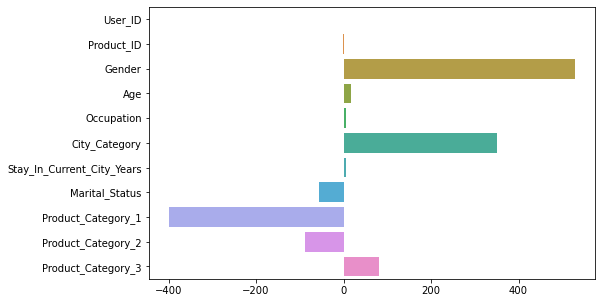

In [258]:
plt.figure(figsize=(8,5))
sns.barplot(x=coeff,y=features)

#### 2. XGBoost Regressor

In [240]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=6,
             min_child_weight=40, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [259]:
pred_xgb=xgb_reg.predict(val_x)
rmse_xgb = np.sqrt(mean_squared_error(pred_y,val_y))
print("RMSE for XGBoost Regressor:", rmse_xgb)

RMSE for XGBoost Regressor: 2505.6292801929458


#### 3. RandomForest Regressor

In [249]:
rf_reg=RandomForestRegressor(max_depth=2, random_state=0)
rf_reg.fit(train_x,train_y)


RandomForestRegressor(max_depth=2, random_state=0)

In [260]:
pred_rf=rf_reg.predict(val_x)
rmse_rf=np.sqrt(mean_squared_error(pred_rf,val_y))
print("RMSE for Random Forest:",rmse_rf)

RMSE for Random Forest: 4163.747031944405


#### 4. AdaBoost Regressor

In [261]:
adb_reg=AdaBoostRegressor(n_estimators=100,random_state=0)
adb_reg.fit(train_x,train_y)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [263]:
pred_adb=adb_reg.predict(val_x)
rmse_adb=np.sqrt(mean_squared_error(pred_adb,val_y))
print("RMSE for Adaboost Regressor:",rmse_adb)


RMSE for Adaboost Regressor: 3595.007906514239


#### 5. Gradient Boosting Regressor

In [264]:
grad_reg=GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, random_state=0)
grad_reg.fit(train_x,train_y)

GradientBoostingRegressor(learning_rate=1.0, random_state=0)

In [265]:
pred_grad=grad_reg.predict(val_x)
rmse_grad=np.sqrt(mean_squared_error(pred_grad,val_y))
print("RMSE for Gradient Boosting Regressor:",rmse_grad)


RMSE for Gradient Boosting Regressor: 2756.5231625627925


In [266]:
xgb_reg.fit(x, y)
predict_final = xgb_reg.predict(test_x)

submission['Purchase'] = predict_final
submission.to_csv('sample_submission_V9Inaty.csv', index=False)

#### Analytics Vidya LB Score : 2948.87